<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Primeras-pruebas" data-toc-modified-id="Primeras-pruebas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Primeras pruebas</a></span></li><li><span><a href="#Pruebas-con-imágenes" data-toc-modified-id="Pruebas-con-imágenes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pruebas con imágenes</a></span><ul class="toc-item"><li><span><a href="#Send-an-image" data-toc-modified-id="Send-an-image-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Send an image</a></span></li><li><span><a href="#Get-embeddings" data-toc-modified-id="Get-embeddings-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Get embeddings</a></span></li></ul></li></ul></div>

In [3]:
import requests
import os
from PIL import Image
import pathlib
from urllib.parse import urljoin

import gdown

* [**Request Files** with FastAPI](https://fastapi.tiangolo.com/tutorial/request-files/)
* [Requests: File Upload](https://www.tutorialspoint.com/requests/requests_file_upload.htm)
* [Torchserve](https://pytorch.org/serve/)

# Primeras pruebas

In [2]:
api = 'http://127.0.0.1:8000'

In [3]:
response = requests.get(api)
response

<Response [200]>

In [37]:
response.headers

{'date': 'Thu, 09 Mar 2023 21:05:53 GMT', 'server': 'uvicorn', 'content-length': '17', 'content-type': 'application/json'}

In [22]:
response.text

'{"Hello":"World"}'

In [17]:
response.content

b'{"Hello":"World"}'

In [22]:
item_id = '89'
response = requests.get(urljoin(api, f'items/{item_id}'))
response

<Response [200]>

In [23]:
response.text

'{"item_id":89,"q":null}'

# Pruebas con imágenes

In [4]:
files_endpoint = "/files/"
test_images_path = pathlib.Path(r'C:\Users\leona\Desktop\test_images_spiders')

In [5]:
example_img = next(iter(test_images_path.glob('*.jpg')))

In [6]:
img_list = list(test_images_path.glob('*.jpg'))

In [7]:
img_list[43]

WindowsPath('C:/Users/leona/Desktop/test_images_spiders/gnaphosidae_0002.jpg')

In [38]:
example_img

WindowsPath('C:/Users/leona/Desktop/test_images_spiders/acanthogonatus_sp _0001.jpg')

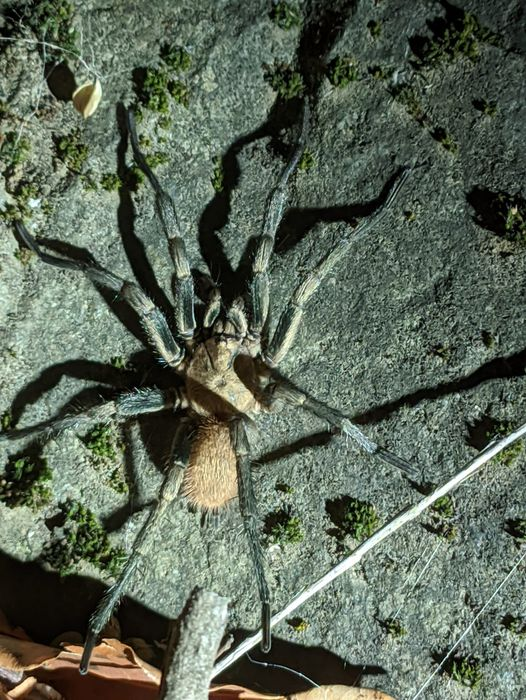

In [11]:
Image.open(example_img)

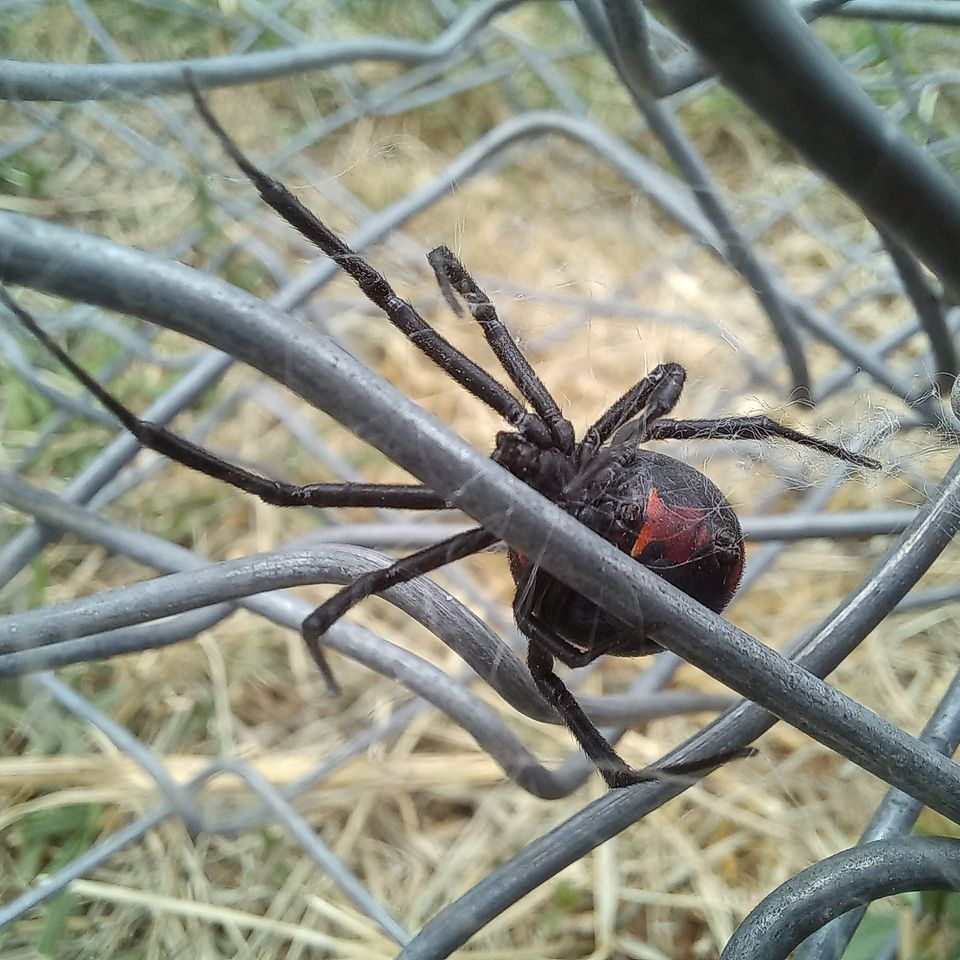

In [98]:
Image.open(img_list[48])

In [91]:
files = {'file': open(example_img, 'rb')}
response = requests.post(urljoin(api, files_endpoint), files=files)
response

<Response [200]>

In [92]:
response.content

b'{"file_size":118382}'

## Send an image

In [81]:
sendimg_endpoint = "/send_img/"

In [82]:
img_list[105]

WindowsPath('C:/Users/leona/Desktop/test_images_spiders/molinaranea_clymene_0002.jpg')

In [89]:
files = {'file': open(img_list[106], 'rb')}
response = requests.post(urljoin(api, sendimg_endpoint), files=files)
response, response.content

(<Response [200]>,
 b'{"nearest_neighbors":["molinaranea clymene","molinaranea clymene","loxosceles laeta","molinaranea clymene","allende sp"]}')

## Get embeddings

In [8]:
getemb_endpoint = "/get_img_embedding/"

In [9]:
files = {'file': open(img_list[108], 'rb')}
response = requests.post(urljoin(api, getemb_endpoint), files=files)
response, response.content

(<Response [200]>,
 b'{"img_embedding":[-0.02176261879503727,0.007707350421696901,-0.03996805101633072,-0.059319380670785904,-0.035745471715927124,-0.005588130559772253,-0.027392426505684853,-0.03873857855796814,-0.047617245465517044,-0.01185122225433588,-0.010611307807266712,0.05335406959056854,-0.03174056112766266,0.028780067339539528,-0.012815761379897594,-0.042987558990716934,-0.012374107725918293,0.022682540118694305,-0.01311834529042244,0.002248314442113042,0.018116388469934464,0.021428121253848076,-0.02241947129368782,0.013449594378471375,0.06824088841676712,-0.07007120549678802,-0.040235910564661026,-0.060678672045469284,-0.015297938138246536,-0.05152072012424469,0.0363360159099102,-0.015609138645231724,0.009002026170492172,-0.0077212038449943066,-0.03235098347067833,0.02770332247018814,0.002733811968937516,0.0007841878687031567,0.0007947998237796128,0.008182596415281296,0.017340566962957382,-0.0032872557640075684,0.039027899503707886,0.011109264567494392,-0.08273410052061081,0

# Download tests

In [2]:
url = "https://drive.google.com/uc?id=11ZnGZ_3yNjmvg9pGScr7oVOewzo6vtJ4"
output = "states_ep22.pt"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=11ZnGZ_3yNjmvg9pGScr7oVOewzo6vtJ4
To: C:\Users\leona\Documents\coder\ejercicios\dl\aranas_chile\states_ep22.pt
100%|██████████| 383M/383M [00:13<00:00, 29.2MB/s] 


'states_ep22.pt'

In [5]:
name_test = 'model_2_b-hard-squared-dist_ep22_50cls.pt'
os.path.join('../', name_test)

'../model_2_b-hard-squared-dist_ep22_50cls.pt'